<a href="https://colab.research.google.com/github/bsudharshan2001/MyRespository/blob/master/College/Semester-5/19CSE305-MachineLearning/CB.EN.U4CSE19008_LabEval2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19CSE305 - Machine Learning - Evaluation 2
---
------------
B Sudharshan - CB.EN.U4CSE19008

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
custData=pd.read_csv('/content/customer_data - customer_data.csv')
custData

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,Eligible,54982665,5.0,1245.5,3.0,77000.0,2.0,15.0,5.0,109.0,5,151300.0,244.948974
1,Not Eligible,59004779,4.0,1277.0,1.0,113000.0,2.0,8.0,-1.0,100.0,3,341759.0,207.173840
2,Not Eligible,58990862,7.0,1298.0,1.0,110000.0,2.0,11.0,-1.0,101.0,5,72001.0,1.000000
3,Eligible,58995168,7.0,1335.5,1.0,151000.0,2.0,11.0,5.0,110.0,3,60084.0,1.000000
4,Not Eligible,54987320,7.0,NaN,2.0,59000.0,2.0,11.0,5.0,108.0,4,450081.0,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,Not Eligible,58988196,5.0,1289.0,1.0,173000.0,2.0,15.0,5.0,112.0,3,350702.0,200.000000
1121,Not Eligible,58987926,5.0,NaN,2.0,NaN,2.0,15.0,5.0,NaN,4,450000.0,169.000000
1122,Not Eligible,58995381,7.0,1220.0,3.0,76000.0,2.0,NaN,2.0,90.0,5,71002.0,1.000000
1123,Not Eligible,58998054,4.0,1250.0,3.0,137000.0,2.0,8.0,5.0,NaN,5,72000.0,1.000000


In [ ]:
custData.describe()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1.125000e+03,1124.000000,973.000000,1124.000000,1.105000e+03,1122.000000,1118.000000,1123.000000,1109.000000,1125.000000,1111.000000,1124.000000
mean,5.783677e+07,5.483096,1283.998972,2.332740,1.208914e+05,1.928699,10.872987,4.832591,100.746619,4.195556,164960.138614,135.118220
std,1.817150e+06,1.383878,51.798453,0.878939,8.888950e+04,0.257442,2.679202,2.973820,11.979141,0.855679,152709.332226,112.595885
min,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.500000,1.000000
50%,5.898975e+07,5.000000,1281.500000,3.000000,1.010000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,5.899799e+07,7.000000,1314.500000,3.000000,1.380000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [ ]:
custData.shape

(1125, 13)

In [ ]:
custData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   object 
 1   id      1125 non-null   int64  
 2   fea_1   1124 non-null   float64
 3   fea_2   973 non-null    float64
 4   fea_3   1124 non-null   float64
 5   fea_4   1105 non-null   float64
 6   fea_5   1122 non-null   float64
 7   fea_6   1118 non-null   float64
 8   fea_7   1123 non-null   float64
 9   fea_8   1109 non-null   float64
 10  fea_9   1125 non-null   int64  
 11  fea_10  1111 non-null   float64
 12  fea_11  1124 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 114.4+ KB


In [ ]:
custData.isnull().sum()

label       0
id          0
fea_1       1
fea_2     152
fea_3       1
fea_4      20
fea_5       3
fea_6       7
fea_7       2
fea_8      16
fea_9       0
fea_10     14
fea_11      1
dtype: int64

In [ ]:
custData.mean()

id        5.783677e+07
fea_1     5.483096e+00
fea_2     1.283999e+03
fea_3     2.332740e+00
fea_4     1.208914e+05
fea_5     1.928699e+00
fea_6     1.087299e+01
fea_7     4.832591e+00
fea_8     1.007466e+02
fea_9     4.195556e+00
fea_10    1.649601e+05
fea_11    1.351182e+02
dtype: float64

In [ ]:
custData.fillna(custData.mean(),inplace = True)
custData.isnull().sum()

label     0
id        0
fea_1     0
fea_2     0
fea_3     0
fea_4     0
fea_5     0
fea_6     0
fea_7     0
fea_8     0
fea_9     0
fea_10    0
fea_11    0
dtype: int64

In [ ]:
custData.drop_duplicates()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,Eligible,54982665,5.0,1245.500000,3.0,77000.000000,2.0,15.000000,5.0,109.000000,5,151300.0,244.948974
1,Not Eligible,59004779,4.0,1277.000000,1.0,113000.000000,2.0,8.000000,-1.0,100.000000,3,341759.0,207.173840
2,Not Eligible,58990862,7.0,1298.000000,1.0,110000.000000,2.0,11.000000,-1.0,101.000000,5,72001.0,1.000000
3,Eligible,58995168,7.0,1335.500000,1.0,151000.000000,2.0,11.000000,5.0,110.000000,3,60084.0,1.000000
4,Not Eligible,54987320,7.0,1283.998972,2.0,59000.000000,2.0,11.000000,5.0,108.000000,4,450081.0,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,Not Eligible,58988196,5.0,1289.000000,1.0,173000.000000,2.0,15.000000,5.0,112.000000,3,350702.0,200.000000
1121,Not Eligible,58987926,5.0,1283.998972,2.0,120891.402715,2.0,15.000000,5.0,100.746619,4,450000.0,169.000000
1122,Not Eligible,58995381,7.0,1220.000000,3.0,76000.000000,2.0,10.872987,2.0,90.000000,5,71002.0,1.000000
1123,Not Eligible,58998054,4.0,1250.000000,3.0,137000.000000,2.0,8.000000,5.0,100.746619,5,72000.0,1.000000


In [ ]:
q1=custData.quantile(0.25)
q3=custData.quantile(0.75)
iqr=q3-q1
print(iqr)
print((custData<(q1-1.5*iqr))|(custData>(q3+1.5*iqr)))

id        4.007497e+06
fea_1     3.000000e+00
fea_2     6.000000e+01
fea_3     2.000000e+00
fea_4     6.500000e+04
fea_5     0.000000e+00
fea_6     3.000000e+00
fea_7     0.000000e+00
fea_8     2.100000e+01
fea_9     2.000000e+00
fea_10    1.049131e+05
fea_11    2.014846e+02
dtype: float64
      fea_1  fea_10  fea_11  fea_2  fea_3  ...  fea_7  fea_8  fea_9     id  label
0     False   False   False  False  False  ...  False  False  False  False  False
1     False    True   False  False  False  ...   True  False  False  False  False
2     False   False   False  False  False  ...   True  False  False  False  False
3     False   False   False  False  False  ...  False  False  False  False  False
4     False    True   False  False  False  ...  False  False  False  False  False
...     ...     ...     ...    ...    ...  ...    ...    ...    ...    ...    ...
1120  False    True   False  False  False  ...  False  False  False  False  False
1121  False    True   False  False  False  ...  False

In [ ]:
r_custData=custData[~((custData<(q1-1.5*iqr))|(custData>(q3+1.5*iqr))).any(axis=1)]
r_custData

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,Eligible,54982665,5.0,1245.500000,3.0,77000.000000,2.0,15.000000,5.0,109.000000,5,151300.0,244.948974
3,Eligible,58995168,7.0,1335.500000,1.0,151000.000000,2.0,11.000000,5.0,110.000000,3,60084.0,1.000000
8,Not Eligible,58984557,5.0,1323.500000,3.0,218000.000000,2.0,15.000000,5.0,100.746619,4,151300.0,282.842713
9,Not Eligible,54990497,4.0,1283.998972,2.0,35000.000000,2.0,8.000000,5.0,101.000000,3,60029.0,237.301496
12,Not Eligible,58989327,7.0,1223.000000,3.0,81000.000000,2.0,11.000000,5.0,114.000000,4,151300.0,194.935887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,Not Eligible,59003741,4.0,1283.998972,2.0,120891.402715,2.0,8.000000,5.0,90.000000,3,60001.0,153.267740
1112,Not Eligible,54982859,5.0,1322.000000,3.0,154000.000000,2.0,15.000000,5.0,110.000000,5,72000.0,204.939015
1113,Not Eligible,59001195,4.0,1311.500000,3.0,120891.402715,2.0,10.872987,5.0,98.000000,4,72000.0,187.082869
1117,Not Eligible,59001031,4.0,1283.998972,2.0,58000.000000,2.0,8.000000,5.0,100.000000,5,151300.0,196.214169


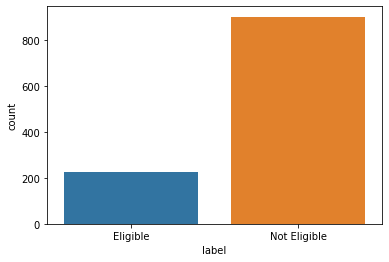

In [ ]:
import seaborn as sns
sns.countplot(x='label',data=custData)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy import percentile
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import zscore

In [ ]:
label_enc=preprocessing.LabelEncoder()
r_custData['label']= label_enc.fit_transform(r_custData['label'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x=r_custData.drop('label',axis =1)
y=r_custData['label']
#Training the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state = 0)
x_train.head()

,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
687,58996120,7.0,1211.0,3.0,66000.0,2.0,11.0,5.0,101.0,4,60015.0,1.000000
429,58995532,7.0,1304.0,3.0,129000.0,2.0,11.0,5.0,103.0,3,151300.0,161.245155
499,54985432,7.0,1260.5,3.0,115000.0,2.0,11.0,5.0,85.0,5,60084.0,1.000000
288,54987040,7.0,1190.0,3.0,95000.0,2.0,11.0,5.0,88.0,3,60019.0,1.000000
415,59005240,4.0,1253.0,1.0,97000.0,2.0,8.0,5.0,115.0,3,60034.0,1.000000


In [ ]:
r_custData

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,0,54982665,5.0,1245.500000,3.0,77000.000000,2.0,15.000000,5.0,109.000000,5,151300.0,244.948974
3,0,58995168,7.0,1335.500000,1.0,151000.000000,2.0,11.000000,5.0,110.000000,3,60084.0,1.000000
8,1,58984557,5.0,1323.500000,3.0,218000.000000,2.0,15.000000,5.0,100.746619,4,151300.0,282.842713
9,1,54990497,4.0,1283.998972,2.0,35000.000000,2.0,8.000000,5.0,101.000000,3,60029.0,237.301496
12,1,58989327,7.0,1223.000000,3.0,81000.000000,2.0,11.000000,5.0,114.000000,4,151300.0,194.935887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,1,59003741,4.0,1283.998972,2.0,120891.402715,2.0,8.000000,5.0,90.000000,3,60001.0,153.267740
1112,1,54982859,5.0,1322.000000,3.0,154000.000000,2.0,15.000000,5.0,110.000000,5,72000.0,204.939015
1113,1,59001195,4.0,1311.500000,3.0,120891.402715,2.0,10.872987,5.0,98.000000,4,72000.0,187.082869
1117,1,59001031,4.0,1283.998972,2.0,58000.000000,2.0,8.000000,5.0,100.000000,5,151300.0,196.214169


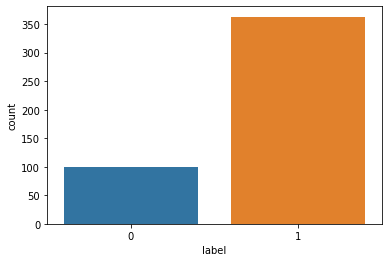

In [ ]:
import seaborn as sns
sns.countplot(x='label',data=r_custData)

In [ ]:
std_scl=StandardScaler()
x_train=std_scl.fit_transform(x_train)
x_test=std_scl.transform(x_test)
print(x_train)
print(x_test)

[[ 0.62080222  1.33313215 -1.5416733  ... -0.08367132 -0.66348313
  -1.10983785]
 [ 0.62047476  1.33313215  0.6099169  ... -1.18733581  1.72389341
   0.42468336]
 [-1.61271327  1.33313215 -0.39647206 ...  1.01999318 -0.66167857
  -1.10983785]
 ...
 [ 0.61419471 -0.1896621  -1.26404876 ... -1.18733581  1.72389341
  -1.10983785]
 [ 0.62449217 -0.95105923 -0.88231501 ... -1.18733581 -0.66337851
   0.53921262]
 [-1.60880445  1.33313215  0.57521383 ... -1.18733581 -0.66387542
  -1.10983785]]
[[ 0.61341617 -0.1896621  -0.11884752 ...  1.01999318 -0.66167857
  -1.10983785]
 [ 0.61655091  1.33313215 -2.09692238 ...  1.01999318 -0.66144319
  -1.10983785]
 [ 0.6146146  -0.1896621   2.06744574 ...  1.01999318 -0.66332621
   1.22623824]
 ...
 [ 0.62568336 -0.95105923 -0.11884752 ... -1.18733581  1.72389341
  -1.10983785]
 [ 0.62068137  1.33313215 -1.02112728 ... -1.18733581 -0.66293391
  -1.10983785]
 [-1.61230507  1.33313215  0.7140261  ... -0.08367132 -0.66377081
  -1.10983785]]


In [ ]:
#Naive-Bayes
from sklearn.metrics import accuracy_score
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
print("Accuracy of the Model: ", accuracy_score(y_test, y_pred))

Accuracy of the Model:  0.7903225806451613


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0  39]
 [  0 147]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.79      1.00      0.88       147

    accuracy                           0.79       186
   macro avg       0.40      0.50      0.44       186
weighted avg       0.62      0.79      0.70       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
result=[]
result.append(accuracy_score(y_test, y_pred))

In [ ]:
#DecisionTree
dt=DecisionTreeClassifier(criterion="entropy",max_depth=5)
dt=dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

In [ ]:
print('Accuracy of the Decision Tree: {:.3f}'.format(metrics.accuracy_score(y_test, y_pred_dt)))
result.append(metrics.accuracy_score(y_test, y_pred_dt))

Accuracy of the Decision Tree: 0.753


In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
print("Accuracy of random forest=",rf.score(x_test,y_test))
result.append(rf.score(x_test,y_test))

Accuracy of random forest= 0.7849462365591398


In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [ ]:
print('Accuracy of KNN: {:.3f}'.format(knn.score(x_test,y_test)))
result.append(knn.score(x_test,y_test))

Accuracy of KNN: 0.747


In [ ]:
#K-Fold
from numpy import array
from sklearn.model_selection import KFold

kf=KFold(3, True, 1)
for train, test in kf.split(r_custData):
	print('train: %s, test: %s' % (x_train,x_test))

train: [[ 0.62080222  1.33313215 -1.5416733  ... -0.08367132 -0.66348313
  -1.10983785]
 [ 0.62047476  1.33313215  0.6099169  ... -1.18733581  1.72389341
   0.42468336]
 [-1.61271327  1.33313215 -0.39647206 ...  1.01999318 -0.66167857
  -1.10983785]
 ...
 [ 0.61419471 -0.1896621  -1.26404876 ... -1.18733581  1.72389341
  -1.10983785]
 [ 0.62449217 -0.95105923 -0.88231501 ... -1.18733581 -0.66337851
   0.53921262]
 [-1.60880445  1.33313215  0.57521383 ... -1.18733581 -0.66387542
  -1.10983785]], test: [[ 0.61341617 -0.1896621  -0.11884752 ...  1.01999318 -0.66167857
  -1.10983785]
 [ 0.61655091  1.33313215 -2.09692238 ...  1.01999318 -0.66144319
  -1.10983785]
 [ 0.6146146  -0.1896621   2.06744574 ...  1.01999318 -0.66332621
   1.22623824]
 ...
 [ 0.62568336 -0.95105923 -0.11884752 ... -1.18733581  1.72389341
  -1.10983785]
 [ 0.62068137  1.33313215 -1.02112728 ... -1.18733581 -0.66293391
  -1.10983785]
 [-1.61230507  1.33313215  0.7140261  ... -0.08367132 -0.66377081
  -1.10983785]]
tr

According to the accuracy scores => Naive-Bayes model is the most accurate model

In [ ]:
#Model Comparison

In [ ]:
#For Random Forest
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0  39]
 [  0 147]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.79      1.00      0.88       147

    accuracy                           0.79       186
   macro avg       0.40      0.50      0.44       186
weighted avg       0.62      0.79      0.70       186



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#For Decision Trees
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[  6  33]
 [ 13 134]]
              precision    recall  f1-score   support

           0       0.32      0.15      0.21        39
           1       0.80      0.91      0.85       147

    accuracy                           0.75       186
   macro avg       0.56      0.53      0.53       186
weighted avg       0.70      0.75      0.72       186



In [ ]:
#KNN
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[  4  35]
 [ 12 135]]
              precision    recall  f1-score   support

           0       0.25      0.10      0.15        39
           1       0.79      0.92      0.85       147

    accuracy                           0.75       186
   macro avg       0.52      0.51      0.50       186
weighted avg       0.68      0.75      0.70       186

